In [12]:
import os
import sys
import glob
import shutil
import datetime
from functools import reduce

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from astropy import units as u
from astropy.time import Time

In [3]:
gp_table = pd.read_table('crab_gp_kaz_10_2010-2018.csv', sep='\t')

## Добавление разного рода колонок через функции

In [4]:
gp_table['amp_GP']  = np.subtract(gp_table['amp of gp, adc u'], gp_table['Median, adc u'])

In [5]:
gp_table['Time_series'] = pd.to_datetime(gp_table['Date'], format='%d.%m.%Y', errors='ignore')

In [6]:
gp_table = gp_table.set_index('Time_series')

In [33]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,amp_GP
Time_series,,,,,,,,,,,,,,,,,
2010-09-12,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,481.97550,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,113.19316,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,-368.78234
2010-10-17,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,673.92450,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,27361,232.17638,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,-441.74812
2010-10-23,23.10.2010,03:55:42.2248611,2.4576,5.988966,2430,34,254.77529,23.837624,./obs_plot/23.10.2010_plot_0531+21.png,.\obs_data\23.10.2010_obs_0531+21.csv,1,74376,637.73886,28.65555,99.00000,./gp_plot/23.10.2010_plot_0531+21_0.png,382.96357
2010-10-23,23.10.2010,03:55:42.2248611,2.4576,5.988966,2430,34,254.77529,23.837624,./obs_plot/23.10.2010_plot_0531+21.png,.\obs_data\23.10.2010_obs_0531+21.csv,1,74359,604.87049,16.40925,16.84485,./gp_plot/23.10.2010_plot_0531+21_1.png,350.09520
2010-10-23,23.10.2010,03:55:42.2248611,2.4576,5.988966,2430,34,254.77529,23.837624,./obs_plot/23.10.2010_plot_0531+21.png,.\obs_data\23.10.2010_obs_0531+21.csv,1,74346,434.98244,12.45915,12.86010,./gp_plot/23.10.2010_plot_0531+21_2.png,180.20715


### Расчет кол-ва сеансов

In [7]:
files_0531 = sorted(
    glob.glob('./obs_data/*'), 
    key=lambda x: datetime.datetime.strptime(os.path.basename(x), '%d.%m.%Y_obs_0531+21.csv'))
len(files_0531)

2777

In [8]:
crap_sessoins = pd.DataFrame(columns=['Date', 'Session'])

In [9]:
idx = 0
for name in files_0531:
    _data = (os.path.basename(name)[6:10] 
             + '-'
             + os.path.basename(name)[3:5]
             + '-'
             + os.path.basename(name)[:2])
    
    crap_sessoins.loc[idx] = [_data, 1]
    idx += 1 
crap_sessoins['Time_series'] = pd.to_datetime(crap_sessoins['Date'], format='%Y-%m-%d', errors='ignore')
crap_sessoins = crap_sessoins.set_index('Time_series')

In [10]:
crap_sessoins.head()

,Date,Session
Time_series,,
2010-02-13,2010-02-13,1
2010-09-03,2010-09-03,1
2010-09-04,2010-09-04,1
2010-09-05,2010-09-05,1
2010-09-06,2010-09-06,1


In [11]:
crap_sessoins['Session'].resample('Y').sum()

Time_series
2010-12-31    105
2011-12-31    326
2012-12-31    317
2013-12-31    361
2014-12-31    326
2015-12-31    357
2016-12-31    341
2017-12-31    355
2018-12-31    289
Freq: A-DEC, Name: Session, dtype: int64

### Статистика для 1112+50

In [12]:
gp_table_1112 = pd.read_table('1112+50_gp_kaz_10.csv', sep='\t')
session_1112 = pd.read_table('1112+50_obs_kaz.csv', sep='\t')

In [13]:
gp_table_1112['Time_series'] = pd.to_datetime(gp_table_1112['Date'], format='%d.%m.%Y', errors='ignore')
session_1112['Time_series'] = pd.to_datetime(session_1112['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_1112 = gp_table_1112.set_index('Time_series')
session_1112 = session_1112.set_index('Time_series')

In [14]:
gp_table_1112.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",File name,"Count of GP, u",Num pulse,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot
Time_series,,,,,,,,,,,,,,,,
2011-01-07,07.01.2011,04:35:00.5850868,2.4576,1.656360,671,182,123.835229,1.683162,070111_1112+50_00_profiles.txt,1,103,343,169.7797,2.3115,4.2210,./gp_plot_pulsar/07.01.2011_plot_1112+50_103.png
2011-01-08,08.01.2011,04:31:04.4960244,2.4576,1.656362,671,182,160.029380,2.298851,080111_1112+50_00_profiles.txt,1,44,345,191.9667,2.1440,4.2545,./gp_plot_pulsar/08.01.2011_plot_1112+50_44.png
2011-01-08,08.01.2011,04:31:04.4960244,2.4576,1.656362,671,182,160.029380,2.349784,080111_1112+50_00_profiles.txt,1,80,346,174.5492,2.4120,5.0585,./gp_plot_pulsar/08.01.2011_plot_1112+50_80.png
2011-01-09,09.01.2011,04:27:08.4964001,2.4576,1.656364,671,182,154.061502,2.171130,090111_1112+50_00_profiles.txt,1,118,342,115.2317,1.8425,3.2160,./gp_plot_pulsar/09.01.2011_plot_1112+50_118.png
2011-01-10,10.01.2011,04:23:12.5874403,2.4576,1.656366,671,182,156.034789,2.720388,100111_1112+50_00_profiles.txt,1,110,344,115.4240,3.2160,7.7050,./gp_plot_pulsar/10.01.2011_plot_1112+50_110.png


In [16]:
session_1112.head()

,Date,Session
Time_series,,
2011-01-01,01.01.2011,1
2011-01-02,02.01.2011,1
2011-01-04,04.01.2011,1
2011-01-06,06.01.2011,1
2011-01-07,07.01.2011,1


In [17]:
gp_table_1112['Count of GP, u'].resample('Y').sum()

Time_series
2011-12-31    100
2012-12-31    126
2013-12-31     86
2014-12-31    247
2015-12-31    291
2016-12-31    588
2017-12-31    408
2018-12-31    320
Freq: A-DEC, Name: Count of GP, u, dtype: int64

In [18]:
session_1112['Session'].resample('Y').sum()

Time_series
2011-12-31    132
2012-12-31    103
2013-12-31     94
2014-12-31    200
2015-12-31    211
2016-12-31    224
2017-12-31    286
2018-12-31    263
Freq: A-DEC, Name: Session, dtype: int64

## Итоговая реализация

### Crab

In [19]:
gp_crab_m = gp_table['Count of GP, u'].resample('M').sum().to_frame()

In [20]:
gp_crab_m_ses = crap_sessoins['Session'].resample('M').sum().to_frame()

In [21]:
result_crab = gp_crab_m.join(gp_crab_m_ses, how='outer')

In [22]:
result_crab.head()

,"Count of GP, u",Session
Time_series,,
2010-02-28,NaN,1
2010-03-31,NaN,False
2010-04-30,NaN,False
2010-05-31,NaN,False
2010-06-30,NaN,False


### 1112+50

In [23]:
gp_1112_m = gp_table_1112['Count of GP, u'].resample('M').sum().to_frame()

In [24]:
gp_1112_m_ses = session_1112['Session'].resample('M').sum().to_frame()

In [25]:
result_1112 = gp_1112_m.join(gp_1112_m_ses, how='outer')

In [26]:
result_1112.head()

,"Count of GP, u",Session
Time_series,,
2011-01-31,17,24
2011-02-28,15,12
2011-03-31,0,5
2011-04-30,6,11
2011-05-31,4,11


## Добавление колонок как отношения количества обнаруженных ГИ к количеству обработанных сеансов.

In [27]:
result_crab['pase_GP']  = np.divide(result_crab['Count of GP, u'], result_crab['Session'])

In [28]:
result_1112['pase_GP']  = np.divide(result_1112['Count of GP, u'], result_1112['Session'])

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [29]:
result_crab.head()

,"Count of GP, u",Session,pase_GP
Time_series,,,
2010-02-28,NaN,1,NaN
2010-03-31,NaN,False,NaN
2010-04-30,NaN,False,NaN
2010-05-31,NaN,False,NaN
2010-06-30,NaN,False,NaN


In [30]:
result_1112.head()

,"Count of GP, u",Session,pase_GP
Time_series,,,
2011-01-31,17,24,0.708333
2011-02-28,15,12,1.250000
2011-03-31,0,5,0.000000
2011-04-30,6,11,0.545455
2011-05-31,4,11,0.363636


In [31]:
ax.get_xticklabels()[0]

NameError: name 'ax' is not defined

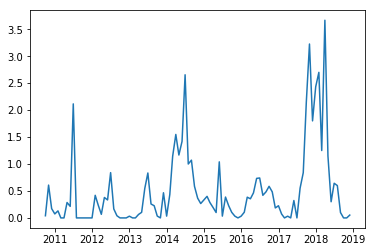

In [32]:
plt.plot(result_crab['pase_GP'])
plt.savefig('res_crab_2010_2018.png', format='png', dpi=150)

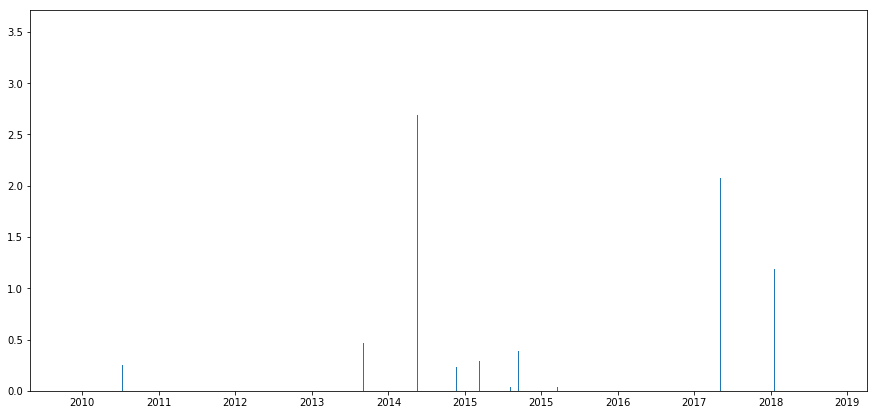

In [38]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(result_crab.index, result_crab['pase_GP'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=300.0))
#plt.subplots_adjust(bottom=0.3)
#plt.savefig('res_crab_2010_2018.png', format='png', dpi=300)

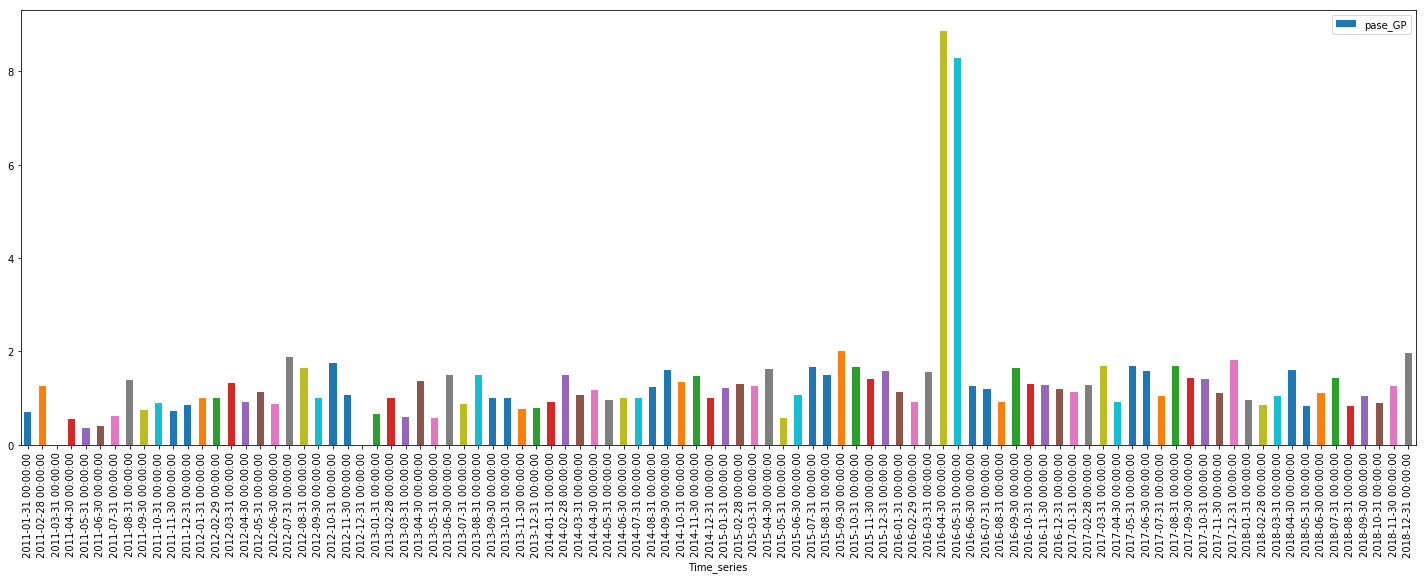

In [31]:
ax = result_1112.reset_index().plot.bar(x='Time_series', y='pase_GP', figsize=(25, 8))
ax

In [33]:


# код позволяющий получить количество сеансов, в которых были обнаруженны ГИ
array_session =  gp_table_1112.index.unique()
data = [1]*len(array_session)
sessions_1112 = pd.DataFrame(
    data=data, 
    index=array_session,
    columns=['Session']
)

## Работа с данными по 1112, но полученными уже по сигма для каждого ИИ отдельно

In [40]:
gp_table_1112 = pd.read_table('1112+50_gp_kaz_10_sigma.csv', sep='\t')
session_1112 = pd.read_table('1112+50_obs_kaz_10_sigma.csv', sep='\t')

In [41]:
gp_table_1112['Time_series'] = pd.to_datetime(gp_table_1112['Date'], format='%d.%m.%Y', errors='ignore')
session_1112['Time_series'] = pd.to_datetime(session_1112['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_1112 = gp_table_1112.set_index('Time_series')
session_1112 = session_1112.set_index('Time_series')

In [42]:
gp_table_1112['Count of GP, u'].resample('Y').sum()

Time_series
2011-12-31    3231
2012-12-31    2084
2013-12-31    2032
2014-12-31    4106
2015-12-31    3513
2016-12-31    2760
2017-12-31    7494
2018-12-31    7927
Freq: A-DEC, Name: Count of GP, u, dtype: int64

In [43]:
session_1112['Session'].resample('Y').sum()

Time_series
2011-12-31    132
2012-12-31    103
2013-12-31     94
2014-12-31    200
2015-12-31    211
2016-12-31    224
2017-12-31    286
2018-12-31    263
Freq: A-DEC, Name: Session, dtype: int64

In [44]:
gp_1112_m = gp_table_1112['Count of GP, u'].resample('M').sum().to_frame()

In [45]:
gp_1112_m_ses = session_1112['Session'].resample('M').sum().to_frame()

In [46]:
result_1112 = gp_1112_m.join(gp_1112_m_ses, how='outer')

In [47]:
result_1112['pase_GP']  = np.divide(result_1112['Count of GP, u'], result_1112['Session'])

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


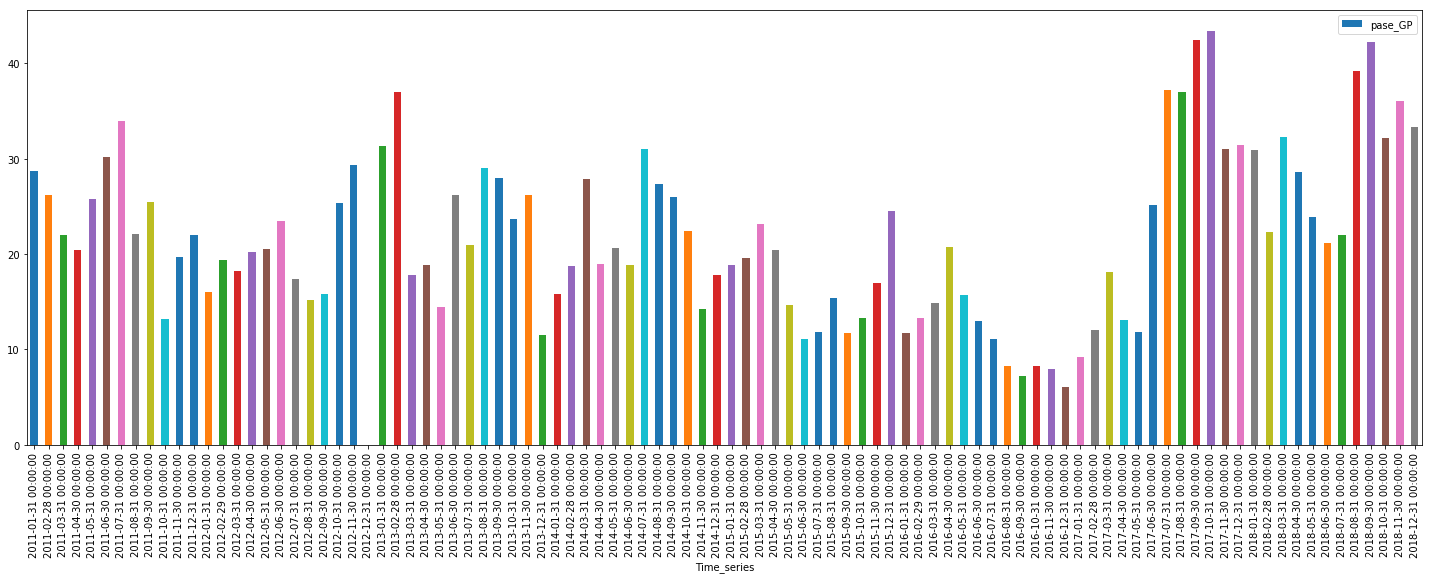

In [48]:
ax = result_1112.reset_index().plot.bar(x='Time_series', y='pase_GP', figsize=(25, 8))
ax

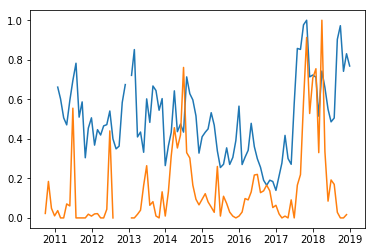

In [45]:
plt.plot(result_1112['pase_GP']/np.max(result_1112['pase_GP']))
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.show()

In [47]:
df = pd.read_csv('calibration.csv', sep='\t', header=0)

In [56]:
df.head()

,Date,3C405_LebedA,3C123,3C144_crab,3C274_deva,3C348_gerculesA
Time_series,,,,,,
2014-01-01,2014-01-01,46668.219620,45426.872142,39810.329436,49781.075378,45266.315095
2014-01-02,2014-01-02,46744.291876,49382.862953,48247.281349,50323.165137,39472.465229
2014-01-03,2014-01-03,47025.435882,47620.745646,48189.457699,50222.825118,44591.223061
2014-01-04,2014-01-04,47121.146191,48989.806536,46915.209888,50278.980159,38819.930650
2014-01-05,2014-01-05,46308.218703,48976.902348,42469.212818,48923.300896,40810.054761


In [48]:
df['Time_series'] = pd.to_datetime(df['Date'], errors='ignore')

In [49]:
df = df.set_index('Time_series')

In [57]:
crab_flux = df['3C144_crab'].resample('M').mean().to_frame()

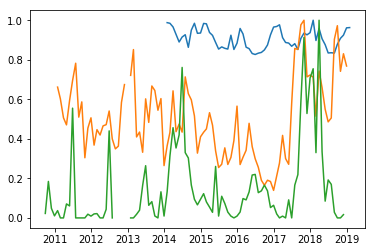

In [61]:
plt.plot(crab_flux['3C144_crab']/np.max(crab_flux['3C144_crab']))
plt.plot(result_1112['pase_GP']/np.max(result_1112['pase_GP']))
plt.plot(result_crab['pase_GP']/np.max(result_crab['pase_GP']))
plt.savefig('crab+1112+bsa.png', format='png', dpi=300)
plt.show()

## Работа с данными по 1112, но полученными уже по сигма для последовательно объедененных импульсов

In [49]:
gp_table_1112 = pd.read_table('1112+50_gp_kaz_10_2010-2018_full_w.csv', sep='\t')

In [86]:
print(len(gp_table_1112))
gp_table_1112.head(4)

26258


,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",File name,"Count of GP, u",Num pulse,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot
Time_series,,,,,,,,,,,,,,,,
2011-01-01,01.01.2011,04:58:35.6097213,2.4576,1.656351,671,182,198.95575,4.00867,./obs_plot_pulsar/01.01.2011_plot_1112+50.png,F:\YandexDisk\1.Работа\Результаты обработки\11...,1,96300,392.5950,8.6989,119.0,./gp_plot_pulsar/01.01.2011_plot_1112+50_0.png
2011-01-01,01.01.2011,04:58:35.6097213,2.4576,1.656351,671,182,198.95575,4.00867,./obs_plot_pulsar/01.01.2011_plot_1112+50.png,F:\YandexDisk\1.Работа\Результаты обработки\11...,1,36577,376.8008,119.0000,119.0,./gp_plot_pulsar/01.01.2011_plot_1112+50_1.png
2011-01-01,01.01.2011,04:58:35.6097213,2.4576,1.656351,671,182,198.95575,4.00867,./obs_plot_pulsar/01.01.2011_plot_1112+50.png,F:\YandexDisk\1.Работа\Результаты обработки\11...,1,76836,325.5712,119.0000,119.0,./gp_plot_pulsar/01.01.2011_plot_1112+50_2.png
2011-01-01,01.01.2011,04:58:35.6097213,2.4576,1.656351,671,182,198.95575,4.00867,./obs_plot_pulsar/01.01.2011_plot_1112+50.png,F:\YandexDisk\1.Работа\Результаты обработки\11...,1,84216,325.0149,119.0000,119.0,./gp_plot_pulsar/01.01.2011_plot_1112+50_3.png


In [51]:
# Расчет сеансов
sessoins_1112_2 = pd.DataFrame(columns=['Date', 'Session'])
idx = 0
for name in gp_table_1112['File name']:
    _data = (os.path.basename(name)[6:10] 
             + '-'
             + os.path.basename(name)[3:5]
             + '-'
             + os.path.basename(name)[:2])
    
    sessoins_1112_2.loc[idx] = [_data, 1]
    idx += 1 
sessoins_1112_2['Time_series'] = pd.to_datetime(sessoins_1112_2['Date'], format='%Y-%m-%d', errors='ignore')
sessoins_1112_2 = sessoins_1112_2.set_index('Time_series')


In [52]:
gp_table_1112['Time_series'] = pd.to_datetime(gp_table_1112['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_1112 = gp_table_1112.set_index('Time_series')

In [87]:
gp_table_1112['Num pulse'].resample('Y').sum()

Time_series
2011-12-31    2589
2012-12-31    1482
2013-12-31    1081
2014-12-31    3291
2015-12-31    2943
2016-12-31    2669
2017-12-31    5591
2018-12-31    5854
2019-12-31     758
Freq: A-DEC, Name: Num pulse, dtype: int64

In [88]:
gp_1112_m = gp_table_1112['Num pulse'].resample('M').sum().to_frame()
gp_1112_m_ses = session_1112['Session'].resample('M').sum().to_frame()
result_1112 = gp_1112_m.join(gp_1112_m_ses, how='outer')
result_1112['pase_GP']  = np.divide(result_1112['Num pulse'], result_1112['Session'])

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


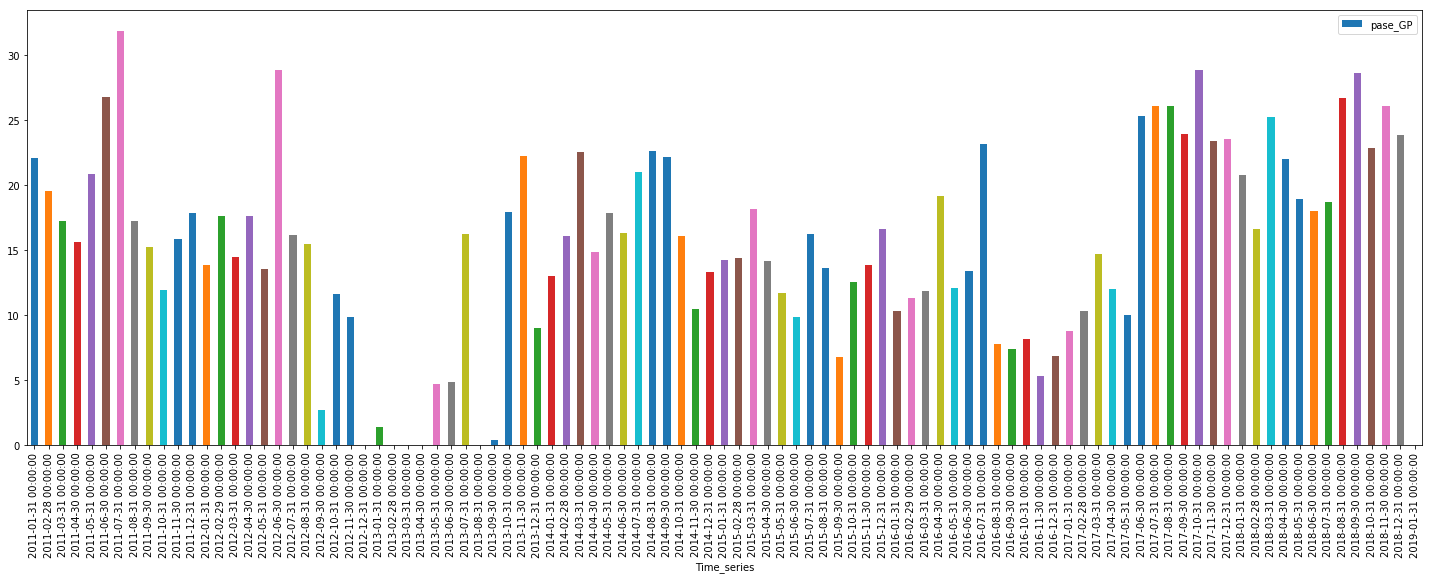

In [89]:
ax = result_1112.reset_index().plot.bar(x='Time_series', y='pase_GP', figsize=(25, 8))
ax

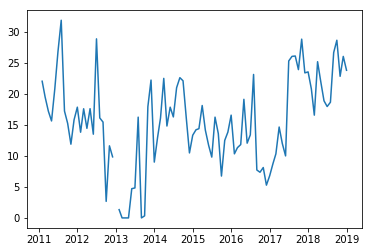

In [90]:
plt.plot(result_1112['pase_GP'])
plt.show()

In [82]:
result_crab_m['pase_GP']

Time_series
2017-03-01    NaN
2017-03-02    1.0
2017-03-03    NaN
2017-03-04    NaN
2017-03-05    NaN
2017-03-06    NaN
2017-03-07    NaN
2017-03-08    NaN
2017-03-09    NaN
2017-03-10    NaN
2017-03-11    NaN
2017-03-12    NaN
2017-03-13    NaN
2017-03-14    NaN
2017-03-15    NaN
2017-03-16    NaN
2017-03-17    NaN
2017-03-18    NaN
2017-03-19    NaN
2017-03-20    NaN
2017-03-21    NaN
2017-03-22    NaN
2017-03-23    NaN
2017-03-24    NaN
2017-03-25    NaN
2017-03-26    NaN
2017-03-27    NaN
2017-03-28    NaN
2017-03-29    NaN
2017-03-30    NaN
2017-03-31    NaN
Freq: D, Name: pase_GP, dtype: float64

## Анализ каждого отдельного глитча по крабу

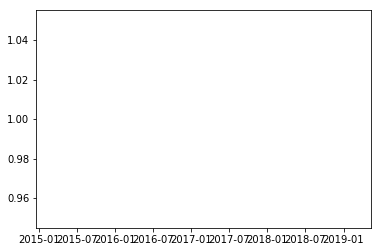

In [81]:
#2017-03-28
part_glitch_1 = gp_table['2017-03']
#sesions_glitch_1 = crap_sessoins['Session']['2017-03']
gp_crab_d = part_glitch_1['Count of GP, u'].resample('D').sum().to_frame()
gp_crab_d_ses = crap_sessoins['Session']['2017-03'].resample('D').sum().to_frame()
result_crab_m = gp_crab_d.join(gp_crab_d_ses, how='outer')
result_crab_m['pase_GP']  = np.divide(result_crab_m['Count of GP, u'], result_crab_m['Session'])

plt.plot(result_crab_m['pase_GP'])
plt.show()

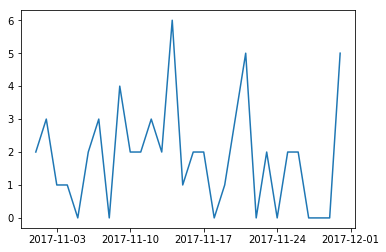

In [83]:
#2017-11-07
part_glitch_2 = gp_table['2017-11']
sesions_glitch_2 = crap_sessoins['Session']['2017-11']
gp_crab_d = part_glitch_2['Count of GP, u'].resample('D').sum().to_frame()
gp_crab_d_ses = crap_sessoins['Session']['2017-11'].resample('D').sum().to_frame()
result_crab_m = gp_crab_d.join(gp_crab_d_ses, how='outer')
result_crab_m['pase_GP']  = np.divide(result_crab_m['Count of GP, u'], result_crab_m['Session'])
plt.plot(result_crab_m['pase_GP'])
plt.show()

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


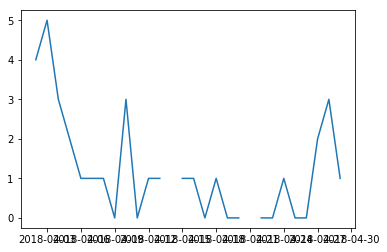

In [84]:
#2018-04-29
part_glitch_3 = gp_table['2018-04']
sesions_glitch_3 = crap_sessoins['Session']['2018-04']
gp_crab_d = part_glitch_3['Count of GP, u'].resample('D').sum().to_frame()
gp_crab_d_ses = crap_sessoins['Session']['2018-04'].resample('D').sum().to_frame()
result_crab_m = gp_crab_d.join(gp_crab_d_ses, how='outer')
result_crab_m['pase_GP']  = np.divide(result_crab_m['Count of GP, u'], result_crab_m['Session'])
plt.plot(result_crab_m['pase_GP'])
plt.show()

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


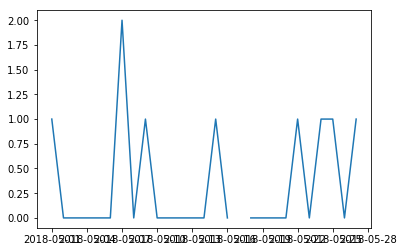

In [91]:
part_glitch_3 = gp_table['2018-05']
sesions_glitch_3 = crap_sessoins['Session']['2018-05']
gp_crab_d = part_glitch_3['Count of GP, u'].resample('D').sum().to_frame()
gp_crab_d_ses = crap_sessoins['Session']['2018-05'].resample('D').sum().to_frame()
result_crab_m = gp_crab_d.join(gp_crab_d_ses, how='outer')
result_crab_m['pase_GP']  = np.divide(result_crab_m['Count of GP, u'], result_crab_m['Session'])
plt.plot(result_crab_m['pase_GP'])
plt.show()

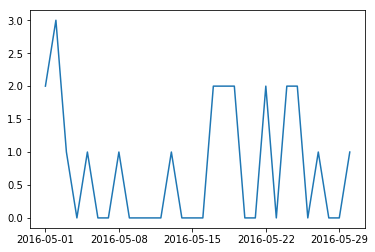

In [92]:
part_glitch_3 = gp_table['2016-05']
sesions_glitch_3 = crap_sessoins['Session']['2016-05']
gp_crab_d = part_glitch_3['Count of GP, u'].resample('D').sum().to_frame()
gp_crab_d_ses = crap_sessoins['Session']['2016-05'].resample('D').sum().to_frame()
result_crab_m = gp_crab_d.join(gp_crab_d_ses, how='outer')
result_crab_m['pase_GP']  = np.divide(result_crab_m['Count of GP, u'], result_crab_m['Session'])
plt.plot(result_crab_m['pase_GP'])
plt.show()

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


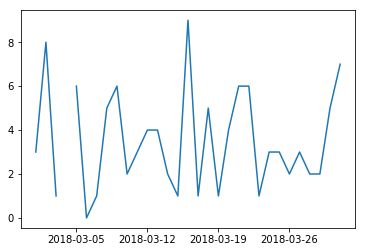

In [95]:
month = '2018-03'
part_glitch_3 = gp_table[month]
sesions_glitch_3 = crap_sessoins['Session'][month]
gp_crab_d = part_glitch_3['Count of GP, u'].resample('D').sum().to_frame()
gp_crab_d_ses = crap_sessoins['Session'][month].resample('D').sum().to_frame()
result_crab_m = gp_crab_d.join(gp_crab_d_ses, how='outer')
result_crab_m['pase_GP']  = np.divide(result_crab_m['Count of GP, u'], result_crab_m['Session'])
plt.plot(result_crab_m['pase_GP'])
plt.show()

### Анализ таблицы данный по крабу с абсолютной калибровкой по туманности

In [6]:
gp_table = pd.read_table('crab_gp_kaz_10_2010-2018_calib.csv', sep='\t')
crab_session = pd.read_table('crab_obs_kaz.csv', sep='\t')

In [7]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",fit 0,fit 1,fit 2,fit 3,path plot
0,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,93.415960,19.17135,99.00000,0.000420,-0.062872,2.046711,39.400855,./gp_plot/05.09.2010_plot_0531+21_0.png
1,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,45640,121.280215,19.30995,54.57375,0.000762,-0.113575,3.805741,35.133432,./gp_plot/09.09.2010_plot_0531+21_0.png
2,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,113.193160,19.54755,63.99360,0.000601,-0.090012,2.987432,38.383197,./gp_plot/12.09.2010_plot_0531+21_0.png
3,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,1,41855,106.751170,18.80505,39.28815,0.000623,-0.090868,2.916125,30.272951,./gp_plot/17.09.2010_plot_0531+21_0.png
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,27361,232.176380,21.53745,74.91825,0.001297,-0.195356,6.697525,67.100955,./gp_plot/17.10.2010_plot_0531+21_0.png


In [8]:
for index, row in gp_table.iterrows():
    cond_1 = float(row['fit 2'] > 5)
    cond_2 = float(row['fit 3'] > 80)
    if cond_1 or cond_2:
        try:
            shutil.move(row['path plot'], './trash/' + os.path.basename(row['path plot']))
        except FileNotFoundError:
            pass

In [3]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",chi,pulses_50,pulses_70,pulses_90,path plot
0,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,93.415960,19.17135,99.00000,30.047037,6.0,2.0,1.0,./gp_plot/05.09.2010_plot_0531+21_0.png
1,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,45640,121.280215,19.30995,54.57375,20.907424,2.0,1.0,1.0,./gp_plot/09.09.2010_plot_0531+21_0.png
2,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,113.193160,19.54755,63.99360,23.729902,2.0,2.0,2.0,./gp_plot/12.09.2010_plot_0531+21_0.png
3,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,1,41855,106.751170,18.80505,39.28815,17.083372,4.0,1.0,1.0,./gp_plot/17.09.2010_plot_0531+21_0.png
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,27361,232.176380,21.53745,74.91825,22.239796,1.0,2.0,1.0,./gp_plot/17.10.2010_plot_0531+21_0.png
5,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,3239,166.038030,12.97395,91.20375,23.696851,2.0,2.0,2.0,./gp_plot/17.10.2010_plot_0531+21_1.png
6,18.10.2010,04:15:21.7248325,2.4576,5.988906,2430,34,1720.0,13.818881,./obs_plot/18.10.2010_plot_0531+21.png,.\obs_data\18.10.2010_obs_0531+21.csv,1,32615,82.396050,11.28105,37.03590,15.826916,3.0,2.0,2.0,./gp_plot/18.10.2010_plot_0531+21_0.png
7,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,1,72039,108.946950,11.64240,38.53575,16.071574,1.5,2.0,2.0,./gp_plot/19.10.2010_plot_0531+21_0.png
8,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,1,26891,102.669660,16.03800,38.49615,18.997537,2.0,3.0,2.0,./gp_plot/19.10.2010_plot_0531+21_1.png
9,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,1,20817,89.004110,14.27580,36.80325,17.077833,3.0,3.0,2.0,./gp_plot/19.10.2010_plot_0531+21_2.png


In [67]:
gp_table[((gp_table['Date'] == '06.01.2013') & (gp_table['path plot'].str.contains('_251.png')))]

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",chi,path plot
8334,06.01.2013,22:54:59.4426727,2.4576,5.994891,2436,34,1720.0,71.738929,./obs_plot/06.01.2013_plot_0531+21.png,.\obs_data\06.01.2013_obs_0531+21.csv,1,13279,90.069045,4.35105,18.86445,13.102544,./gp_plot/06.01.2013_plot_0531+21_251.png


In [39]:
crab_session.head()

,Date,Session
0,13.02.2010,1
1,03.09.2010,1
2,04.09.2010,1
3,05.09.2010,1
4,06.09.2010,1


In [40]:
gp_table['amp_GP']  = np.subtract(gp_table['amp of gp, adc u'], gp_table['Median, adc u'])
gp_table['Time_series'] = pd.to_datetime(gp_table['Date'], format='%d.%m.%Y', errors='ignore')
gp_table = gp_table.set_index('Time_series')

In [41]:
gp_crab_m = gp_table['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crap_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m.join(gp_crab_m_ses, how='outer')
result_crab.head()

,"Count of GP, u",Session
Time_series,,
2010-02-28,NaN,1
2010-03-31,NaN,False
2010-04-30,NaN,False
2010-05-31,NaN,False
2010-06-30,NaN,False


In [42]:
result_crab['pase_GP']  = np.divide(result_crab['Count of GP, u'], result_crab['Session'])

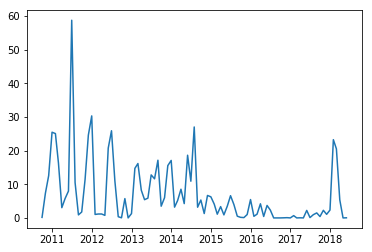

In [43]:
plt.plot(result_crab['pase_GP'])
plt.show()

### Анализ данных по крабу с абсолютной калибровкой по туманности и типизацией "импульс/помеха"

In [4]:
gp_table = pd.read_table('crab_gp_kaz_10_2016-2018_calib_typed.csv', sep='\t')
crab_session = pd.read_table('crab_obs_kaz.csv', sep='\t')

In [5]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type
0,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,93.415960,19.17135,99.00000,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,Pulse
1,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,45640,121.280215,19.30995,54.57375,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,Pulse
2,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,113.193160,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse
3,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,1,41855,106.751170,18.80505,39.28815,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,Pulse
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,27361,232.176380,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,Pulse


In [6]:
crab_session.head()

,Date,Session
0,13.02.2010,1
1,03.09.2010,1
2,04.09.2010,1
3,05.09.2010,1
4,06.09.2010,1


In [7]:
gp_pulses = gp_table[gp_table.Type == 'Pulse']

In [33]:
gp_pulses['MJD'] = None

In [35]:
gp_pulses.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type,MJD
Time_series,,,,,,,,,,,,,,,,,,,
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,93.415960,19.17135,99.00000,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,Pulse,None
2010-09-09,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,45640,121.280215,19.30995,54.57375,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,Pulse,None
2010-09-12,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,113.193160,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse,None
2010-09-17,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,1,41855,106.751170,18.80505,39.28815,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,Pulse,None
2010-10-17,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,27361,232.176380,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,Pulse,None


In [45]:
# Добавление колонки MJD
itr = 0
for index, row in gp_pulses.iterrows():
    day, month, year = row['Date'].split('.')
    time_utc = (Time('{}-{}-{}T'.format(year, month, day) + row['Time start'], precision=7)
            - 4*u.hour
            + row['point of gp, point']*float(row['Tay, ms'])*u.millisecond)
    gp_pulses['MJD'][itr] = str(time_utc.mjd)
    itr += 1

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [47]:
gp_pulses['Time_series'] = pd.to_datetime(gp_pulses['Date'], format='%d.%m.%Y', errors='ignore')
gp_pulses = gp_pulses.set_index('Time_series')
crab_session['Time_series'] = pd.to_datetime(crab_session['Date'], format='%d.%m.%Y', errors='ignore')
crab_session = crab_session.set_index('Time_series')

In [48]:
gp_crab_m = gp_pulses['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_session['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m.join(gp_crab_m_ses, how='outer')
result_crab.head()

,"Count of GP, u",Session
Time_series,,
2010-02-28,NaN,1
2010-03-31,NaN,0
2010-04-30,NaN,0
2010-05-31,NaN,0
2010-06-30,NaN,0


In [49]:
result_crab['pase_GP']  = np.divide(result_crab['Count of GP, u'], result_crab['Session'])

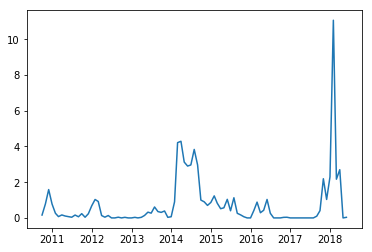

In [50]:
plt.plot(result_crab['pase_GP'])
plt.show()

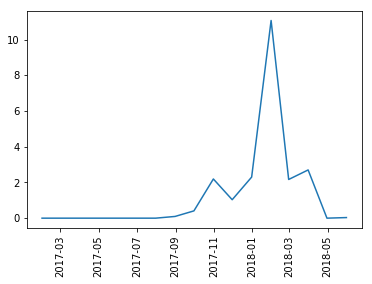

In [51]:
plt.plot(result_crab['pase_GP']['2017':'2018'])
#plt.xlim(2017, 2018)
plt.xticks(rotation='vertical')
plt.show()

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


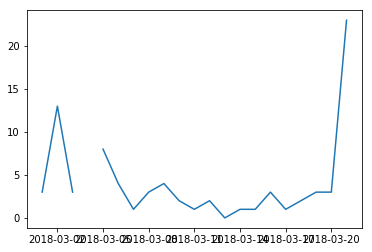

In [52]:
month = '2018-03'
part_glitch_3 = gp_pulses[month]
sesions_glitch_3 = crab_session['Session'][month]
gp_crab_d = part_glitch_3['Count of GP, u'].resample('D').sum().to_frame()
gp_crab_d_ses = crab_session['Session'][month].resample('D').sum().to_frame()
result_crab_m = gp_crab_d.join(gp_crab_d_ses, how='outer')
result_crab_m['pase_GP']  = np.divide(result_crab_m['Count of GP, u'], result_crab_m['Session'])
plt.plot(result_crab_m['pase_GP'])
plt.show()

In [53]:
# Добавление медианы к пиковой плотности потока импульса
gp_pulses['amp_GP']  = gp_pulses['amp of gp, adc u'] + gp_pulses['Median, adc u']

#### Статистика по минимальной и максимальной плотности потока

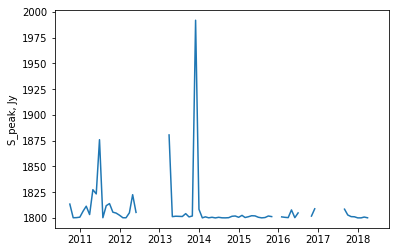

In [54]:
plt.plot(gp_pulses['amp_GP'].resample('M').min().to_frame())
plt.ylabel('S_peak, Jy')
plt.show()

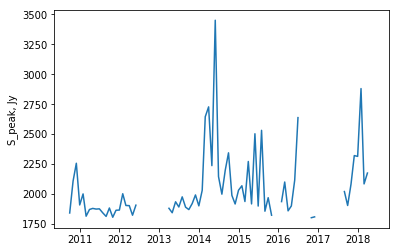

In [55]:
plt.plot(gp_pulses['amp_GP'].resample('M').max().to_frame())
plt.ylabel('S_peak, Jy')
plt.show()

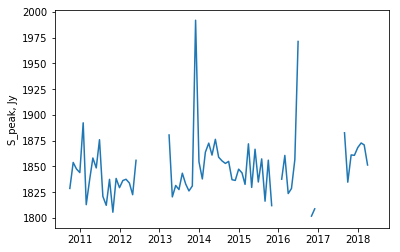

In [56]:
plt.plot(gp_pulses['amp_GP'].resample('M').mean().to_frame())
plt.ylabel('S_peak, Jy')
plt.show()

#### Темп генерации совместно с количеством проанализированных сеансов

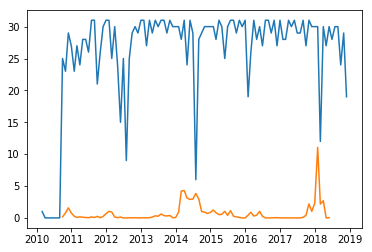

In [57]:
plt.close()
plt.plot(result_crab['Session'])
plt.plot(result_crab['pase_GP'])
plt.show()

In [58]:
# создание колонки энергия 
gp_pulses['E, Jy*ms']  = (
    (gp_pulses['amp of gp, adc u'] + gp_pulses['Median, adc u'])
    *  gp_pulses['W50, point']
    * gp_pulses['Tay, ms'])

In [59]:
gp_pulses.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,...,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type,MJD,amp_GP,"E, Jy*ms"
Time_series,,,,,,,,,,,,,,,,,,,,,
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,...,21354,93.415960,19.17135,99.00000,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,Pulse,55444.12867937864,1813.415960,85440.017362
2010-09-09,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,...,45640,121.280215,19.30995,54.57375,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,Pulse,55448.11844910061,1841.280215,87380.038994
2010-09-12,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,...,36629,113.193160,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse,55451.11000177682,1833.193160,88066.707345
2010-09-17,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,...,41855,106.751170,18.80505,39.28815,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,Pulse,55456.09649887536,1826.751170,84423.836687
2010-10-17,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,...,27361,232.176380,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,Pulse,55486.014176779034,1952.176380,103329.549129


#### Распределение ГИ по пиковым плотностям потока и энергии для периодов повышенного темпа генерации ГИ

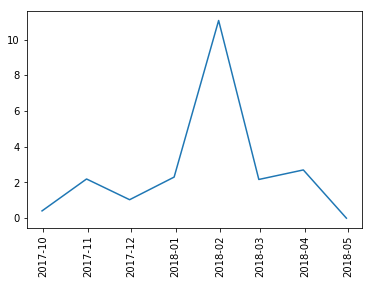

In [60]:
plt.plot(result_crab['pase_GP']['2017-09':'2018-04'])
#plt.xlim(2017, 2018)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
gp_pulses_17_18 = gp_pulses['2017-09':'2018-04']

In [62]:
gp_pulses_17_18.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,...,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type,MJD,amp_GP,"E, Jy*ms"
Time_series,,,,,,,,,,,,,,,,,,,,,
2017-09-03,03.09.2017,07:11:30.7024765,2.4576,6.005065,2442,34,1720.0,3.286847,./obs_plot/03.09.2017_plot_0531+21.png,.\obs_data\03.09.2017_obs_0531+21.csv,...,24728,167.735125,11.12760,53.02935,./gp_plot/03.09.2017_plot_0531+21_0.png,./gp_plot_txt/03.09.2017_plot_0531+21_1.csv,Pulse,57999.13369761585,1887.735125,51624.250680
2017-09-10,10.09.2017,06:43:59.4152870,2.4576,6.005098,2442,34,1720.0,4.625880,./obs_plot/10.09.2017_plot_0531+21.png,.\obs_data\10.09.2017_obs_0531+21.csv,...,68845,86.015215,9.26640,36.90720,./gp_plot/10.09.2017_plot_0531+21_0.png,./gp_plot_txt/10.09.2017_plot_0531+21_1.csv,Pulse,58006.115840379156,1806.015215,41128.573473
2017-09-13,13.09.2017,06:32:11.7067279,2.4576,6.005114,2442,34,1720.0,2.885232,./obs_plot/13.09.2017_plot_0531+21.png,.\obs_data\13.09.2017_obs_0531+21.csv,...,35066,82.837130,9.44955,32.11065,./gp_plot/13.09.2017_plot_0531+21_0.png,./gp_plot_txt/13.09.2017_plot_0531+21_1.csv,Pulse,58009.10668848298,1802.837130,41867.672621
2017-09-14,14.09.2017,06:28:15.8184194,2.4576,6.005120,2442,34,1720.0,13.170412,./obs_plot/14.09.2017_plot_0531+21.png,.\obs_data\14.09.2017_obs_0531+21.csv,...,66216,85.074990,14.82525,42.10470,./gp_plot/14.09.2017_plot_0531+21_0.png,./gp_plot_txt/14.09.2017_plot_0531+21_1.csv,Pulse,58010.10484433867,1805.074990,65767.066818
2017-09-16,16.09.2017,06:20:23.9939212,2.4576,6.005132,2442,34,1720.0,4.582223,./obs_plot/16.09.2017_plot_0531+21.png,.\obs_data\16.09.2017_obs_0531+21.csv,...,52763,95.921210,9.56340,30.02670,./gp_plot/16.09.2017_plot_0531+21_0.png,./gp_plot_txt/16.09.2017_plot_0531+21_1.csv,Pulse,58012.09900074387,1815.921210,42679.617699


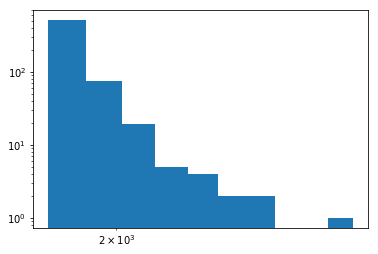

In [63]:
plt.close()
plt.hist(gp_pulses_17_18['amp_GP'])
plt.loglog(True)
plt.show()

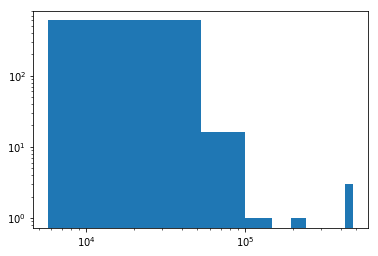

In [64]:
plt.close()
plt.hist(gp_pulses_17_18['E, Jy*ms'])
plt.loglog(True)
plt.show()

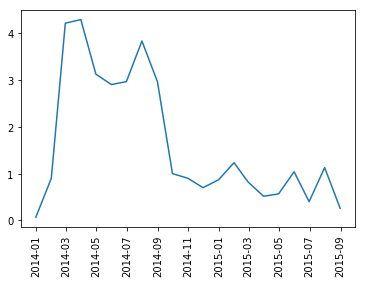

In [65]:
plt.plot(result_crab['pase_GP']['2013-12':'2015-08'])
#plt.xlim(2017, 2018)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
gp_pulses_14_15 = gp_pulses['2013-12':'2015-08']

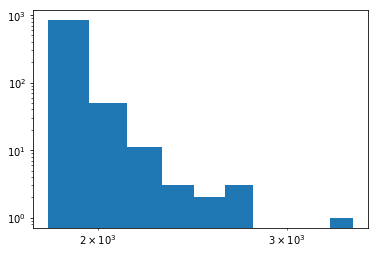

In [67]:
plt.close()
plt.hist(gp_pulses_14_15['amp_GP'])
plt.loglog(True)
plt.show()

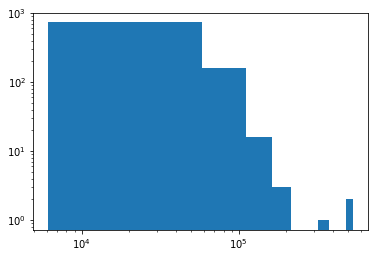

In [68]:
plt.close()
plt.hist(gp_pulses_14_15['E, Jy*ms'])
plt.loglog(True)
plt.show()

In [69]:
gp_pulses_off_pulse = pd.concat([gp_pulses[:'2013-12'], gp_pulses['2015-08':'2017-09'], gp_pulses['2018-04']])

In [70]:
gp_pulses_off_pulse.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,...,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type,MJD,amp_GP,"E, Jy*ms"
Time_series,,,,,,,,,,,,,,,,,,,,,
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,...,21354,93.415960,19.17135,99.00000,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,Pulse,55444.12867937864,1813.415960,85440.017362
2010-09-09,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,...,45640,121.280215,19.30995,54.57375,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,Pulse,55448.11844910061,1841.280215,87380.038994
2010-09-12,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,...,36629,113.193160,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse,55451.11000177682,1833.193160,88066.707345
2010-09-17,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,...,41855,106.751170,18.80505,39.28815,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,Pulse,55456.09649887536,1826.751170,84423.836687
2010-10-17,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,...,27361,232.176380,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,Pulse,55486.014176779034,1952.176380,103329.549129


In [71]:
gp_crab_m = gp_pulses_off_pulse['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_session['Session'].resample('M').sum().to_frame()
result_crab_off_pulse = gp_crab_m.join(gp_crab_m_ses, how='outer')
result_crab_off_pulse.head()

,"Count of GP, u",Session
Time_series,,
2010-02-28,NaN,1
2010-03-31,NaN,0
2010-04-30,NaN,0
2010-05-31,NaN,0
2010-06-30,NaN,0


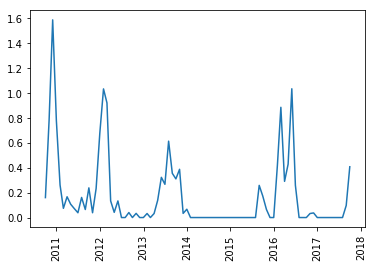

In [72]:
result_crab_off_pulse['pase_GP']  = np.divide(result_crab_off_pulse['Count of GP, u'], result_crab_off_pulse['Session'])
plt.plot(result_crab_off_pulse['pase_GP'])
#plt.xlim(2017, 2018)
plt.xticks(rotation='vertical')
plt.show()

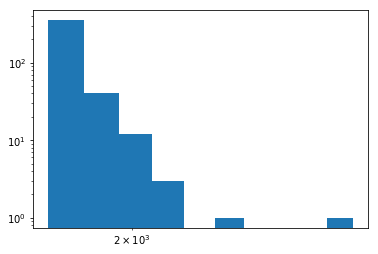

In [73]:
plt.close()
plt.hist(gp_pulses_off_pulse['amp_GP'])
plt.loglog(True)
plt.show()

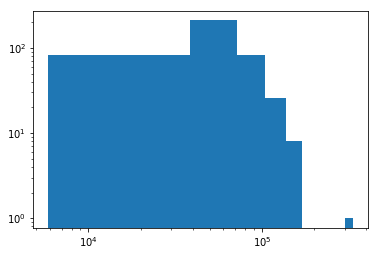

In [74]:
plt.close()
plt.hist(gp_pulses_off_pulse['E, Jy*ms'])
plt.loglog(True)
plt.show()

#### График пиковой плотности потока и энергии ГИ по всем зарегистрирвоанным импульсам. 

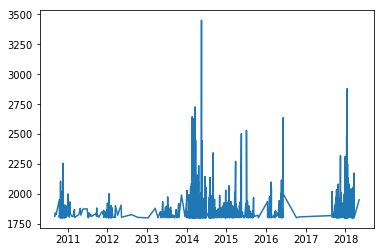

In [75]:
plt.close()
plt.plot(gp_pulses['amp_GP'])
plt.show()

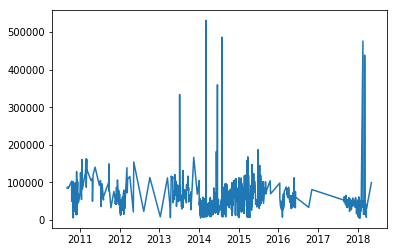

In [76]:
plt.close()
plt.plot(gp_pulses['E, Jy*ms'])
plt.show()

In [77]:
gp_pulses_14_15.to_csv('crab_gp_kaz_14-15_calib_typed.csv',  sep='\t', header=True, index=False)
gp_pulses_17_18.to_csv('crab_gp_kaz_17-18_calib_typed.csv',  sep='\t', header=True, index=False)
gp_pulses_off_pulse.to_csv('crab_gp_kaz_off_pulse_calib_typed.csv',  sep='\t', header=True, index=False)

In [38]:
gp_pulses_off_pulse.columns.values

array(['Date', 'Time start', 'Tay, ms', 'Period, s', 'Numpointwin, point',
       'Numpulse, a.u.', 'Median, adc u', 'STD, adc u', 'path obs plot',
       'path obs data', 'Count of GP, u', 'point of gp, point',
       'amp of gp, adc u', 'W50, point', 'W10, point', 'path plot',
       'fName', 'Type', 'amp_GP', 'E, Jy*ms'], dtype=object)

In [78]:
gp_pulses.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,...,"point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type,MJD,amp_GP,"E, Jy*ms"
Time_series,,,,,,,,,,,,,,,,,,,,,
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,...,21354,93.415960,19.17135,99.00000,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,Pulse,55444.12867937864,1813.415960,85440.017362
2010-09-09,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,...,45640,121.280215,19.30995,54.57375,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,Pulse,55448.11844910061,1841.280215,87380.038994
2010-09-12,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,...,36629,113.193160,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse,55451.11000177682,1833.193160,88066.707345
2010-09-17,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,...,41855,106.751170,18.80505,39.28815,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,Pulse,55456.09649887536,1826.751170,84423.836687
2010-10-17,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,...,27361,232.176380,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,Pulse,55486.014176779034,1952.176380,103329.549129


In [79]:
gp_pulses_final = gp_pulses[['Date',
                             'Time start',
                             'point of gp, point',
                             'MJD',
                            'amp_GP',
                            'E, Jy*ms',
                            'W50, point',
                            'W10, point',
                            'Period, s',
                            'Numpointwin, point',
                            'Tay, ms',
                            'Median, adc u',
                            'STD, adc u',]]

In [81]:
gp_pulses_final_17_18 = gp_pulses_final['2017-09':'2018-04']
gp_pulses_final_14_15 =gp_pulses_final['2013-12':'2015-08']
gp_pulses_final_off_pulse = pd.concat([gp_pulses_final[:'2013-12'],
                                gp_pulses_final['2015-08':'2017-09'],
                                 gp_pulses_final['2018-04']])

In [82]:
gp_pulses_final.to_csv('crab_gp_kaz_pulses.csv',  sep='\t', header=True, index=False)
gp_pulses_final_14_15.to_csv('crab_gp_kaz_14-15_pulses.csv',  sep='\t', header=True, index=False)
gp_pulses_final_17_18.to_csv('crab_gp_kaz_17-18_pulses.csv',  sep='\t', header=True, index=False)
gp_pulses_final_off_pulse.to_csv('crab_gp_kaz_off_pulse_pulses.csv',  sep='\t', header=True, index=False)